# KNN Implementation in Scikit-learn

In [15]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

import seaborn as sns
sns.set()

In [16]:
# Loading the dataset
breast_cancer = load_breast_cancer()
X = pd.DataFrame(breast_cancer.data , 
columns = breast_cancer.feature_names)

X = X[['mean area','mean compactness']]
y = pd.Categorical.from_codes(breast_cancer.target,
breast_cancer.target_names)

y = pd.get_dummies(y,drop_first = True)

In [18]:
# Splitting dataset for trainig and testing
X_train, X_test,y_train,y_test = train_test_split(X,y,
random_state = 1 )                                                  

In [19]:
# Tunning thr KNN classifier , K(neigbors) = 5
knn = KNeighborsClassifier(n_neighbors = 5,metric = 'euclidean')
knn.fit(X_train,y_train)

/home/baleshwar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [20]:
# Model prediction
y_pred = knn.predict(X_test)

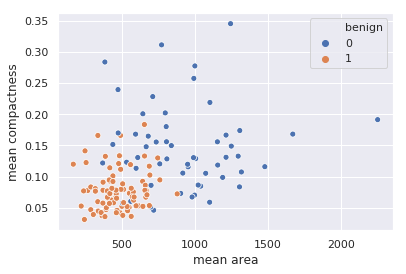

In [22]:
# Visualizing the model prediction
sns.scatterplot(
    x = 'mean area',
    y = 'mean compactness',
    hue = 'benign',
    data = X_test.join(y_test,how = 'outer')
)

# Encoding : malignant --> 0 and benign --> 1

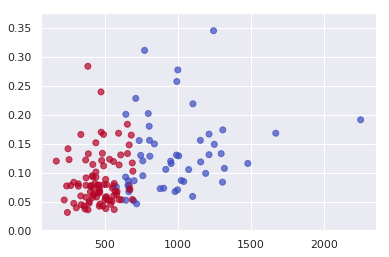

In [24]:
plt.scatter(
    X_test['mean area'],
    X_test['mean compactness'],
    c = y_pred,
    cmap = 'coolwarm',
    alpha = 0.7
)

In [25]:
# Confusion matrix
confusion_matrix(y_test,y_pred)

array([[42, 13],
       [ 9, 79]])

In [30]:
# The numbers on the diagonal of the confusion matrix correspond 
# to correct predictions whereas the others imply false positives
# and false negatives

print('Model accuracy :',121/143)

Model accuracy : 0.8461538461538461
